In [2]:
import csv
import random
import math
import numpy as np 
import operator
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from collections import defaultdict
from sklearn.mixture import GaussianMixture 
from sklearn.cluster import AgglomerativeClustering
from numpy import linalg as LA
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import style
import re
import seaborn as sns
from scipy import optimize as op

In [10]:
def normalize(X, axis=-1, order=2):
    """ Normalize the dataset X """
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [11]:
class l1_regularization():
    """ Regularization for Lasso Regression """
    def __init__(self, alpha):
        self.alpha = alpha
    
    def __call__(self, w):
        return self.alpha * np.linalg.norm(w)

    def grad(self, w):
        return self.alpha * np.sign(w)

In [12]:
class l2_regularization():
    """ Regularization for Ridge Regression """
    def __init__(self, alpha):
        self.alpha = alpha
    
    def __call__(self, w):
        return self.alpha * 0.5 *  w.T.dot(w)

    def grad(self, w):
        return self.alpha * w

In [185]:
df = pd.read_csv("AdmissionDataset/data.csv")
df.drop(columns={'Serial No.'}, inplace=True)
df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,317,103,2,2.5,2.0,8.15,0,0.65
1,319,108,3,3.0,3.5,8.54,1,0.71
2,322,110,3,3.5,2.5,8.67,1,0.80
3,326,113,5,4.5,4.0,9.40,1,0.91
4,319,106,3,3.5,2.5,8.33,1,0.74


In [37]:
def split_dataset(data,val):
    X = data.loc[0:, data.columns != val]
    Y = data.loc[0:, val]
    X_train, X_test, Y_train, Y_test = train_test_split(  X, Y, test_size = 0.25,shuffle=True)
    return X, Y, X_train, X_test, Y_train, Y_test

In [186]:
X, Y, X_train, X_test, Y_train, Y_test = split_dataset(df,"Chance of Admit")

In [188]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X = standardScaler.fit_transform(X)
# X = np.matrix(ss_x.transform(X))

In [212]:
classifier = RidgeRegression(100)
classifier.fit(X,Y)
print(classifier.w)

[0.58981818 0.02570138 0.02193521 0.01139701 0.00870036 0.01544221
 0.0440418  0.01399533]


In [213]:
prediction = classifier.predict(X)


In [32]:
((prediction - Y)**2).mean()

NameError: name 'prediction' is not defined

## Ridge Regression

In [3]:
def calculateCost(x,theta,Y):
    prediction = np.dot(x,theta)
    return ((prediction - Y)**2).mean()/2

In [88]:
my_data = pd.read_csv("AdmissionDataset/data.csv")
my_data.drop(columns={'Serial No.'}, inplace=True)
X = my_data.iloc[:,0:7]
ones = np.ones([X.shape[0],1])
X_b = np.concatenate((ones,X),axis=1)
y = my_data.iloc[:,7:8]
y = np.asarray(y)
tt = X_b.T.dot(X_b)
dim = tt.shape[0]
ident = np.identity(dim)
tmp = 0
lamb = []
cost = []
while tmp < 10:
    theta_best = np.linalg.inv(X_b.T.dot(X_b)+ tmp*ident).dot(X_b.T).dot(y)
    cst = calculateCost(X_b,theta_best,y)
    lamb.append(tmp)
    cost.append(cst)
    tmp = tmp + 0.0001

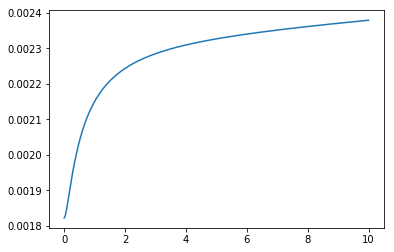

In [89]:
plt.plot(lamb,cost)

## Lasso Regression

In [74]:
def soft_thresholding_operator(self, x, lambda_):
    if x > 0.0 and lambda_ < abs(x):
        return x - lambda_
    elif x < 0.0 and lambda_ < abs(x):
        return x + lambda_
    else:
        return 0.0

def lasso_regression(X, y, alpha = 0.1, max_iter= 1000, fit_intercept= True, lambda_ = 1):
    if fit_intercept:
        X = np.column_stack((np.ones(len(X)),X))

    beta = np.zeros(X.shape[1])
    if fit_intercept:
        beta[0] = np.sum(y - np.dot(X[:, 1:], beta[1:]))/(X.shape[0])

    for iteration in range(max_iter):
        start = 1 if fit_intercept else 0
        for j in range(start, len(beta)):
            tmp_beta = beta.copy()
            tmp_beta[j] = 0.0
            r_j = y - np.dot(X, tmp_beta)
            arg1 = np.dot(X[:, j], r_j)
            arg2 = alpha*X.shape[0]

            beta[j] = soft_thresholding_operator(arg1, arg2, lambda_)/(X[:, j]**2).sum()

            if fit_intercept:
                beta[0] = np.sum(y - np.dot(X[:, 1:], beta[1:]))/(X.shape[0])

    if fit_intercept:
        intercept_ = beta[0]
        coef_ = beta[1:]
    else:
        coef_ = beta

    return coef_

In [75]:
my_data = pd.read_csv("AdmissionDataset/data.csv")
my_data.drop(columns={'Serial No.'}, inplace=True)
X = my_data.iloc[:,0:7]
y = my_data.iloc[:,7:8]
y = np.asarray(y)
lasso_regression(X,y)

array([9.74589009e-07, 8.48769525e-06, 8.83002208e-03, 7.96127923e-03,
       7.59340754e-03, 1.32250500e-03, 1.76706827e-01])

In [79]:
tmp = 0
lamb = []
cost = []
while tmp < 10:
    lasso_regression(X,y,lambda_ = tmp)
    ones = np.ones([X.shape[0],1])
    X_b = np.concatenate((ones,X),axis=1)
    cst = calculateCost(X_b,theta_best,y)
    lamb.append(tmp)
    cost.append(cst)
    tmp = tmp + 1

1
2
3
4
5
6
7
8
9
10


In [57]:
def soft_threshold(rho,lamda):
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0
    

def coordinate_descent_lasso(theta,X,y,lamda = .01, num_iters=100, intercept = False):
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X in case it was not done before
    
    for i in range(num_iters): 
        
        for j in range(n):
            
            #Vectorized implementation
            X_j = X[:,j].reshape(-1,1)
            y_pred = X @ theta
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
        
            #Checking intercept parameter
            if intercept == True:  
                if j == 0: 
                    theta[j] =  rho 
                else:
                    theta[j] =  soft_threshold(rho, lamda)  

            if intercept == False:
                theta[j] =  soft_threshold(rho, lamda)   
            
    return theta.flatten()

In [65]:
# Initialize variables
m,n = X.shape
initial_theta = np.ones((n,1))
theta_list = list()
lamb = []
cost = []
lamda = np.logspace(0,4,300)/10 #Range of lambda values

tmp = 0
#Run lasso regression for each lambda
while tmp < 1:
    print(tmp)
    theta = coordinate_descent_lasso(initial_theta,X,y,lamda = tmp, num_iters=100)
    theta_list.append(theta)
    lamb.append(tmp)
    cst = calculateCost(X,theta,y)
    cost.append(cst)
    tmp = tmp + 0.001

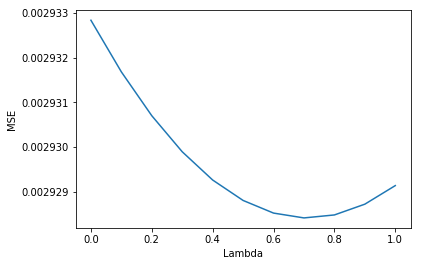

In [87]:
def load_file(filename):
    train_data, test_data = [], []
    dataset = []
    with open(filename) as csvfile:
        lines = csv.reader(csvfile)
        dataset = np.array(list(lines))

    dataset = np.array(dataset[1:, :], dtype=float)

    np.random.shuffle(dataset)

    train_size = int(0.8 * len(dataset))
    train_data = dataset[:train_size, :]
    train_data = np.array(train_data)
    test_data = dataset[train_size:, :]
    test_data = np.array(test_data)

    return train_data, test_data

def classifyXY(data):
    X = data[:, :-1]
    Y = data[:, -1]
    return X, Y

def normalizeData(data):
    mean = np.ones(data.shape[1])
    std = np.ones(data.shape[1])

    for i in range(0, data.shape[1]):
        mean[i] = np.mean(data.transpose()[i])
        std[i] = np.std(data.transpose()[i])
        for j in range(0, data.shape[0]):
            data[j][i] = (data[j][i] - mean[i])/std[i]

    return data

def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    h = np.dot(theta, X.T)
    h = h.reshape(X.shape[0])
    return h

def BGD(theta, alpha, num_iters, h, X, y, n, lamb):
    cost = np.ones(num_iters)
    i = 0
    while i < num_iters:
        theta[0] = theta[0] - (alpha/(2*X.shape[0])) * sum(h - y)
        theta = theta - (alpha / (2 * X.shape[0])) * np.sum(np.dot((h - y), X) + lamb * np.sign(theta))
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y) + lamb * np.sum(np.absolute(theta)))
        i = i + 1
    theta = theta.reshape(1,n+1)
    return theta, cost

def linear_regression(X, y, alpha, num_iters, lamb):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis=1)
    theta = np.zeros(n+1)
    h = hypothesis(theta, X, n)
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n,lamb)
    return theta, cost

def classifier():
    filename = "AdmissionDataset/data.csv"
    train_data, test_data = load_file(filename)

    X_train, y_train = classifyXY(train_data)
    X_test, y_test = classifyXY(test_data)

    X_train = normalizeData(X_train)
    X_test = normalizeData(X_test)

    ones = np.ones((X_test.shape[0],1))
    X_test = np.concatenate((ones, X_test), axis=1)

    num_iters, alpha = 20000, 0.001

    lambs = np.linspace(0, 1, 11)

    errors = []

    for lamb in lambs:
        theta, cost = linear_regression(X_train, y_train, alpha, num_iters, lamb)

        predictions = hypothesis(theta, X_test, X_test.shape[1]-1)

        finalCost_mse = (1/X_test.shape[0]) * 0.5 * sum(np.square(predictions - y_test))

        errors.append(finalCost_mse)
classifier()

## K fold


In [118]:
def kfold(k, inp_data):
    err_arr_K_fold = []
    for i in range(k):
        
        size = inp_data.shape[0]
        stride = int(size/k)
        tmp2 = inp_data[stride*(i+1) + 1:, :]
        tmp1 = inp_data[0:(stride*i), :]
        
        test_data = inp_data[(stride*i):stride*(i+1), :]

        if(tmp1.shape[0] != 0 and tmp1.shape[0] != 0):
            train_data = np.vstack((tmp1, tmp2))
        elif(tmp1.shape[0] != 0):
            train_data = tmp1
        elif(tmp2.shape[0] != 0):
            train_data = tmp2
            
        X = train_data[:, :-1]
        y = train_data[:, -1]
        ones = np.ones([X.shape[0],1])
        X_b = np.concatenate((ones,X),axis=1)
        
        tt = X_b.T.dot(X_b)
        dim = tt.shape[0]
        ident = np.identity(dim)
        tmp = 0.01
        
        theta_best = np.linalg.inv(X_b.T.dot(X_b)+ tmp*ident).dot(X_b.T).dot(y)
        cst = calculateCost(X_b,theta_best,y)
        
        err_arr_K_fold.append(cst)
    return np.mean(np.asarray(err_arr_K_fold))

In [119]:
my_data = pd.read_csv("AdmissionDataset/data.csv")
my_data.drop(columns={'Serial No.'}, inplace=True)
my_data = np.asarray(my_data)
kfold(10,my_data)

0.0018146686104253333

## Leave one out

In [116]:
def leave_one_out(k, inp_data):
    err_arr_K_fold = []
    for i in range(k):
        
        size = inp_data.shape[0]
        stride = int(size/k)
        tmp2 = inp_data[stride*(i+1) + 1:, :]
        tmp1 = inp_data[0:(stride*i), :]
        
        test_data = inp_data[(stride*i):stride*(i+1), :]

        if(tmp1.shape[0] != 0 and tmp1.shape[0] != 0):
            train_data = np.vstack((tmp1, tmp2))
        elif(tmp1.shape[0] != 0):
            train_data = tmp1
        elif(tmp2.shape[0] != 0):
            train_data = tmp2
            
        X = train_data[:, :-1]
        y = train_data[:, -1]
        ones = np.ones([X.shape[0],1])
        X_b = np.concatenate((ones,X),axis=1)
        
        tt = X_b.T.dot(X_b)
        dim = tt.shape[0]
        ident = np.identity(dim)
        tmp = 0.01
        
        theta_best = np.linalg.inv(X_b.T.dot(X_b)+ tmp*ident).dot(X_b.T).dot(y)
        cst = calculateCost(X_b,theta_best,y)
        
        err_arr_K_fold.append(cst)
    return np.mean(np.asarray(err_arr_K_fold))

In [117]:
my_data = pd.read_csv("AdmissionDataset/data.csv")
my_data.drop(columns={'Serial No.'}, inplace=True)
my_data = np.asarray(my_data)
leave_one_out(my_data.shape[0]-1,my_data)

0.0018229976387770376